# 루브릭
|평가문항|상세기준|self check|
|:-------|:-------|:-----------------------|
|1. 이미지 분류기 모델이 성공적으로 만들어졌는가?|학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음|OK|
|2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?|오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음|OK|
|3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?|60% 이상 도달하였음|OK|

### dataset
 * https://teachablemachine.withgoogle.com/ 


<hr/>

 * trainset/validationset  
1. rock 224*224 500장
2. scissor 224*224 500장
3. pager 224*224 500장

<hr/>

 * testset
1. rock 224*224 100장
2. scissor 224*224 100장
3. pager 224*224 100장


### 적용할 알고리즘
1. CNN(Convolutional Neural Network)

### 분류 성능 평가 지표  
1. Accuracy(정확도)


## 문제 정의  

> CNN 알고리즘으로 이미지 분류기 모델 만들기   
> 성능 평가 지표 accuracy 60% 이상 도달하기


## 분석 결과  
 **1. 성능 평가**
 
|Metrics|CNN| 
|---------|----------|
|Accuracy|68 %|


## 분석환경

In [120]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)
print(np.__version__)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from PIL import Image
import glob

from sklearn.model_selection import train_test_split

2.11.0
1.21.5


## 1. 데이터 준비

#### 데이터 불러오기 + Resize(28X28) 하기

In [121]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg") 
    #images=glob.glob(img_path + "/*.png")
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    #target_size=(32,32)
    for img in images:
        old_img=Image.open(img)
        #new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img=old_img.resize(target_size,Image.Resampling.LANCZOS)
        new_img.save(img, "JPEG")
          
    print(len(images), " images resized.")


* train/validataion data 28X28 resize

In [122]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = './ALL/scissor'
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = './ALL/rock'
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = './ALL/paper'
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

500  images to be resized.
500  images resized.
가위 이미지 resize 완료!
500  images to be resized.
500  images resized.
바위 이미지 resize 완료!
500  images to be resized.
500  images resized.
보 이미지 resize 완료!


* test data 28X28 resize

In [123]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = './ALL/test/scissor'
resize_images(image_dir_path)
print("test 가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = './ALL/test/rock'
resize_images(image_dir_path)
print("test 가위 이미지 resize 완료!")

# 보이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = './ALL/test/paper'
resize_images(image_dir_path)
print("test 가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
test 가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
test 가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
test 가위 이미지 resize 완료!


#### 이미지 데이터 및 라벨 불러오기
* label
  - scissor : 0
  - rock : 1
  - paper : 2

In [124]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    #img_size=32
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
     
    print("로드된 이미지 개수는", idx,"입니다.")
    return imgs, labels

* train data 로드 및 정규화

In [125]:
#image_dir_path = './data'
image_dir_path = './ALL'
(x_train, y_train)=load_data(image_dir_path, number_of_data=500*3)

로드된 이미지 개수는 1500 입니다.


In [126]:
x_train = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (1500, 28, 28, 3)
y_train shape: (1500,)


* test data 로드 및 정규화

In [127]:
image_dir_path_test = './ALL/test'
(x_test, y_test)=load_data(image_dir_path_test)
x_test = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

로드된 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


* train data/ validation data 나누기

In [128]:
from sklearn.model_selection import train_test_split

# stratify=y_train 지정 - 검증데이터 분류 비율이 골고루 분포하도록 설정함
X_train, X_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=2023,stratify=y_train)

print('X_train shape', X_train.shape)
print('X_val shape',X_val.shape)
print('y_train shape',y_train.shape)
print('y_val shape',y_val.shape)
print('y_train\n',y_train)
print('y_val\n',y_val)

X_train shape (1200, 28, 28, 3)
X_val shape (300, 28, 28, 3)
y_train shape (1200,)
y_val shape (300,)
y_train
 [0 1 1 ... 0 1 0]
y_val
 [1 2 1 1 1 0 2 1 0 0 2 0 2 0 0 1 1 2 2 2 2 2 1 2 1 1 2 2 0 2 2 2 1 0 2 0 0
 1 0 2 1 2 1 0 2 2 0 1 1 2 0 1 0 1 0 1 1 1 2 1 1 0 0 0 2 0 1 0 1 0 1 1 0 1
 0 2 0 2 1 1 0 0 2 0 2 1 1 2 2 2 2 2 1 0 0 0 2 2 0 2 0 1 1 1 2 1 1 1 2 2 1
 2 0 0 0 0 0 1 0 2 1 2 1 0 1 0 0 1 2 0 0 2 0 2 2 2 1 1 2 2 0 0 1 2 0 1 2 1
 2 0 2 2 2 1 2 0 0 1 1 2 2 1 1 2 1 2 2 2 0 2 0 0 1 1 2 2 1 1 2 1 0 0 1 1 2
 1 2 0 0 0 1 0 0 2 0 2 2 1 2 1 2 1 1 0 2 2 0 1 1 1 0 2 1 0 0 0 1 1 0 0 2 2
 1 1 0 0 2 2 2 2 2 1 0 1 0 1 0 2 1 2 1 1 2 1 2 2 2 0 0 0 2 0 2 1 0 0 2 0 0
 2 0 0 2 1 0 2 1 0 0 0 2 1 0 0 0 1 2 1 2 0 1 2 0 0 0 1 2 1 1 0 1 0 1 2 1 0
 1 0 1 1]


#### 데이터 정규화 전처리 확인

In [129]:
print('X_train: ' ,'최소값:',np.min(X_train), '최대값:',np.max(X_train))
print('X_val:', '최소값:',np.min(X_val), '최대값:',np.max(X_val))
print('x_test:', '최소값:',np.min(x_test), '최대값:',np.max(x_test))

X_train:  최소값: 0.0 최대값: 1.0
X_val: 최소값: 0.0 최대값: 1.0
x_test: 최소값: 0.0 최대값: 0.8313725490196079


In [130]:
X_train
y_train

array([[[[0.60784314, 0.76470588, 0.77254902],
         [0.60392157, 0.76078431, 0.76862745],
         [0.6       , 0.74901961, 0.76078431],
         ...,
         [0.4627451 , 0.57647059, 0.56862745],
         [0.46666667, 0.56862745, 0.56470588],
         [0.4627451 , 0.56470588, 0.55294118]],

        [[0.63529412, 0.78431373, 0.79607843],
         [0.63137255, 0.78039216, 0.79215686],
         [0.62352941, 0.77254902, 0.78431373],
         ...,
         [0.4745098 , 0.58823529, 0.58039216],
         [0.47843137, 0.58039216, 0.57647059],
         [0.4745098 , 0.57647059, 0.56470588]],

        [[0.6627451 , 0.8       , 0.81568627],
         [0.65490196, 0.79215686, 0.80784314],
         [0.64705882, 0.78431373, 0.8       ],
         ...,
         [0.48627451, 0.6       , 0.59215686],
         [0.49019608, 0.59215686, 0.58823529],
         [0.48627451, 0.58823529, 0.58431373]],

        ...,

        [[0.60784314, 0.70980392, 0.71372549],
         [0.62352941, 0.73333333, 0.74509804]

array([0, 1, 1, ..., 0, 1, 0])

In [131]:
X_val
y_val

array([[[[0.79215686, 0.81568627, 0.8627451 ],
         [0.74509804, 0.76862745, 0.81568627],
         [0.72156863, 0.74509804, 0.79215686],
         ...,
         [0.54509804, 0.56078431, 0.59607843],
         [0.54117647, 0.55686275, 0.59215686],
         [0.54117647, 0.55686275, 0.59215686]],

        [[0.81960784, 0.84313725, 0.89019608],
         [0.76078431, 0.78431373, 0.83137255],
         [0.7254902 , 0.74901961, 0.79607843],
         ...,
         [0.54509804, 0.56078431, 0.59607843],
         [0.54117647, 0.55686275, 0.59215686],
         [0.5372549 , 0.55294118, 0.58823529]],

        [[0.84313725, 0.86666667, 0.91372549],
         [0.79215686, 0.81568627, 0.8627451 ],
         [0.76078431, 0.78431373, 0.83137255],
         ...,
         [0.54509804, 0.55686275, 0.58431373],
         [0.54117647, 0.55294118, 0.58039216],
         [0.5372549 , 0.54901961, 0.57647059]],

        ...,

        [[0.4745098 , 0.58039216, 0.51372549],
         [0.55294118, 0.6       , 0.54509804]

array([1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 0,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2,
       1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1,
       2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1,
       0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 0, 0, 1,
       2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1])

In [132]:
x_test
y_test

array([[[[0.46666667, 0.58039216, 0.57254902],
         [0.4745098 , 0.58823529, 0.58039216],
         [0.48235294, 0.59607843, 0.58039216],
         ...,
         [0.38431373, 0.52156863, 0.49411765],
         [0.38039216, 0.5254902 , 0.49803922],
         [0.41176471, 0.55294118, 0.5372549 ]],

        [[0.47058824, 0.58431373, 0.57647059],
         [0.4745098 , 0.58823529, 0.58039216],
         [0.48235294, 0.59607843, 0.58039216],
         ...,
         [0.38039216, 0.50980392, 0.48235294],
         [0.39215686, 0.52941176, 0.50588235],
         [0.43529412, 0.57647059, 0.56078431]],

        [[0.47843137, 0.58039216, 0.57647059],
         [0.48627451, 0.58823529, 0.58431373],
         [0.49411765, 0.59607843, 0.58431373],
         ...,
         [0.37254902, 0.49411765, 0.47058824],
         [0.40784314, 0.53333333, 0.51372549],
         [0.47058824, 0.59607843, 0.58431373]],

        ...,

        [[0.35294118, 0.40784314, 0.45098039],
         [0.41176471, 0.48235294, 0.52156863]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 이미지 확인

라벨:  0


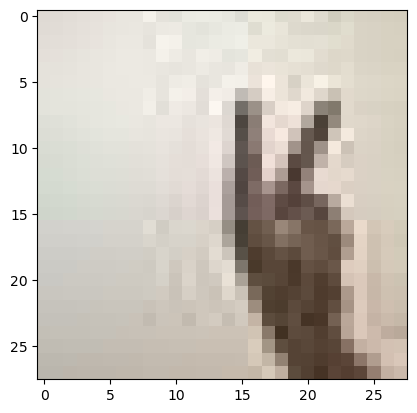

In [133]:
plt.imshow(X_train[1199])
print('라벨: ', y_train[1199])

라벨:  0


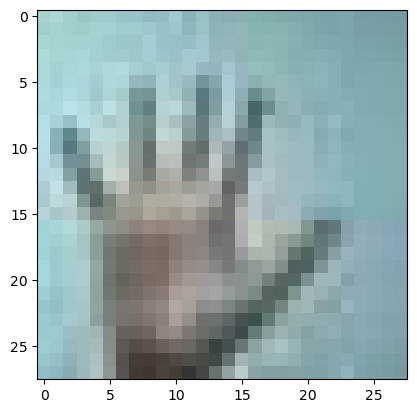

In [134]:
plt.imshow(X_val[1])
print('라벨: ', y_val[11])

라벨:  2


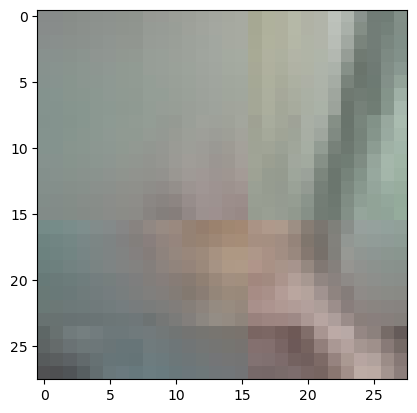

In [135]:
plt.imshow(x_test[200])
print('라벨: ', y_test[200])

## 2. 딥러닝 네트워크 설계하기

In [136]:
n_channel_1=16*2
n_channel_2=32*2
n_channel_3 = 64*2
n_dense=32*4*4

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  10
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_74 (MaxPoolin

## 3. 딥러닝 네트워크 학습시키기

In [137]:
print(f"shape - X_train_norm shape: {X_train.shape}")
print(f"shape - X_val_norm shape: {X_val.shape}")
print(f"shape - x_test_norm shape: {x_test.shape}")

shape - X_train_norm shape: (1200, 28, 28, 3)
shape - X_val_norm shape: (300, 28, 28, 3)
shape - x_test_norm shape: (300, 28, 28, 3)


In [138]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

n_train_epoch=10*5

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

#모델 학습
history = model.fit(x=X_train, y=y_train, epochs=n_train_epoch, batch_size=200,  validation_data=(X_val,y_val), shuffle=True, callbacks =[early_stopping_callback] )

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/50
6/6 [==============================] - 1s 69ms/step - loss: 1.0960 - accuracy: 0.3500 - val_loss: 1.0778 - val_accuracy: 0.4067
Epoch 2/50
6/6 [==============================] - 0s 50ms/step - loss: 1.0667 - accuracy: 0.4817 - val_loss: 1.0275 - val_accuracy: 0.4800
Epoch 3/50
6/6 [==============================] - 0s 50ms/step - loss: 1.0061 - accuracy: 0.5217 - val_loss: 0.9326 - val_accuracy: 0.5367
Epoch 4/50
6/6 [==============================] - 0s 52ms/step - loss: 0.8884 - accuracy: 0.6000 - val_loss: 0.7974 - val_accuracy: 0.6467
Epoch 5/50
6/6 [==============================] - 0s 51ms/step - loss: 0.8141 - accuracy: 0.6333 - val_loss: 0.6860 - val_accuracy: 0.7200
Epoch 6/50
6/6 [==============================] - 0s 51ms/step - loss: 0.6862 - accuracy: 0.7200 - val_loss: 0.6264 - val_accuracy: 0.7900
Epoch 7/50
6/6 [==============================] - 0s 52ms/step - loss: 0.6130 - accuracy: 0.7592 - val_loss: 0.5387 - val_accuracy: 0.7433
Epoch 8/50
6/6 [===========

* 학습 결과에 대한 그래프를 시각화
  * train loss / val loss

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

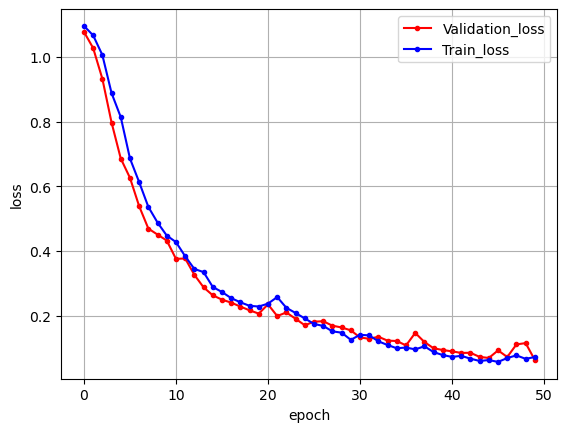

In [139]:
import matplotlib.pyplot as plt

# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validation_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Train_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

* 학습 결과에 대한 그래프를 시각화
  * train acc / val acc

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'accuracy')

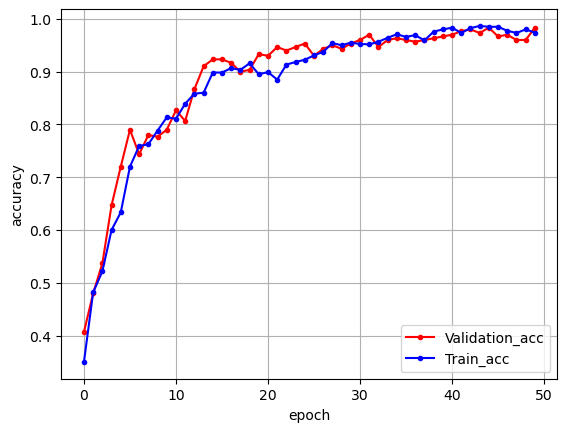

In [140]:
# 검증셋과 학습셋의 accuracy 저장
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']

# 그래프로 표현
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c="red", label='Validation_acc')
plt.plot(x_len, y_acc, marker='.', c="blue", label='Train_acc')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='lower right')
plt.grid()

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


## 4. 성능 평가(테스트)

In [152]:
x_test
y_test

array([[[[0.46666667, 0.58039216, 0.57254902],
         [0.4745098 , 0.58823529, 0.58039216],
         [0.48235294, 0.59607843, 0.58039216],
         ...,
         [0.38431373, 0.52156863, 0.49411765],
         [0.38039216, 0.5254902 , 0.49803922],
         [0.41176471, 0.55294118, 0.5372549 ]],

        [[0.47058824, 0.58431373, 0.57647059],
         [0.4745098 , 0.58823529, 0.58039216],
         [0.48235294, 0.59607843, 0.58039216],
         ...,
         [0.38039216, 0.50980392, 0.48235294],
         [0.39215686, 0.52941176, 0.50588235],
         [0.43529412, 0.57647059, 0.56078431]],

        [[0.47843137, 0.58039216, 0.57647059],
         [0.48627451, 0.58823529, 0.58431373],
         [0.49411765, 0.59607843, 0.58431373],
         ...,
         [0.37254902, 0.49411765, 0.47058824],
         [0.40784314, 0.53333333, 0.51372549],
         [0.47058824, 0.59607843, 0.58431373]],

        ...,

        [[0.35294118, 0.40784314, 0.45098039],
         [0.41176471, 0.48235294, 0.52156863]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### model.evaluate 

In [153]:
# 테스트 데이터로 성능 평가
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.8140 - accuracy: 0.6833 - 57ms/epoch - 6ms/step
test_loss: 0.8139587640762329
test_accuracy: 0.6833333373069763


#### predict(예측)값과 실제 값 비교

In [151]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=101  #101번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])


10/10 [==============================] - 0s 4ms/step
model.predict() 결과 :  [0.05103568 0.9299454  0.01901893]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  1


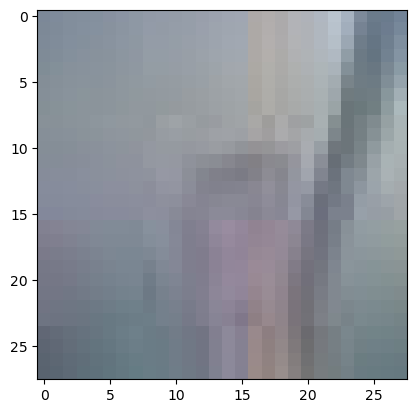

In [150]:
plt.imshow(x_test[idx])
plt.show()

예측확률분포: [0.3572558  0.49079263 0.1519515 ]
라벨: 2, 예측결과: 1


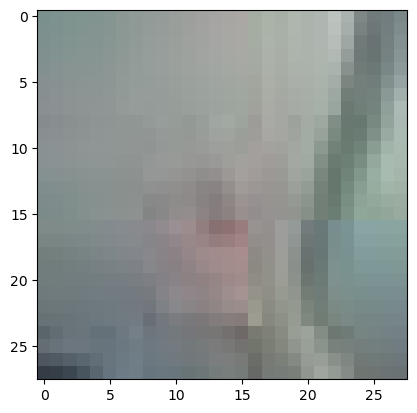

예측확률분포: [0.22494143 0.09392101 0.68113756]
라벨: 1, 예측결과: 2


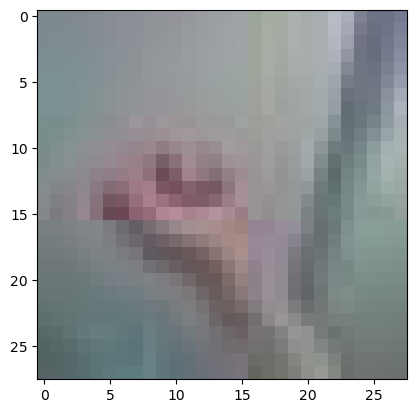

예측확률분포: [0.09468964 0.844316   0.06099441]
라벨: 0, 예측결과: 1


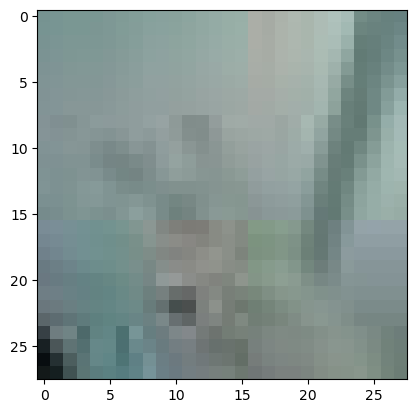

예측확률분포: [0.98700804 0.01078621 0.00220583]
라벨: 1, 예측결과: 0


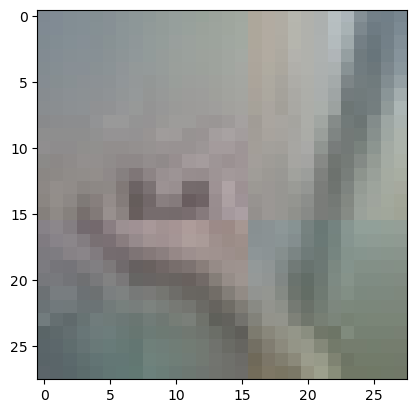

예측확률분포: [0.04735912 0.35530022 0.5973407 ]
라벨: 1, 예측결과: 2


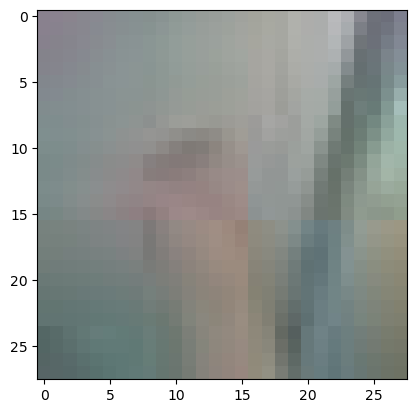

In [98]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [99]:
diff = pd.DataFrame(y_test)
diff.columns=['test']
diff['predict'] = pd.DataFrame(predicted_labels)
diff[diff['test'] != diff['predict']]

predicted_labels
y_test

,test,predict
0,0,1
1,0,1
3,0,1
12,0,1
13,0,1
...,...,...
261,2,0
278,2,1
284,2,0
289,2,1


array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 회고

* 시도 1 round
  * 28X28 300장 dataset으로 진행 시에는 학습데이터는 100% , 테스트데이터로는 30% 이하로 정확도가 나옴
  * 과적합 시에 epoch 10회도 되지 않아 학습데이터/검증데이터 모두 정확도가 100으로 수렴 함  
  * 하이퍼 파라미터 변경해봐도 별 차이가 없었음

* 시도 2 round
  * 56X56 300장 dataset으로 진행 시에는 테스트데이터 정확도 45% 정도까지 올라감
  * 하지만 여전히 과적합 시에 epoch 10회도 되지 않아 학습데이터/검증데이터 모두 정확도가 100으로 수렴 함
  * 하이퍼 파라미터 변경하여 50% 정확도까지 올림
 
* 시도 3 round
  * 28X28 1500장 dataset으로 진행(5가지 다른 유형임)
  * 예전보다는 천천히 정확도 100%로 수렴함
  * 하이퍼 파라미터 변경하여 68% 정확도까지 올림
    * Convolutional layer/ maxpooling/ dropout layer 추가함


## 참고문헌
* [모두의 딥러닝 개정3판](https://thebook.io/080324/)